In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Air_Fryer_Reviews.csv')

In [3]:
df.duplicated().sum()

3245

In [4]:
df.shape

(5000, 2)

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(1755, 2)

In [7]:
df.isnull().sum()

Product Name    0
Review Text     0
dtype: int64

In [8]:
df.head()

,Product Name,Review Text
0,Inalsa Air Fryer Fry-Light 1400W,The air fryer struggles to cook thicker items ...
1,Bajaj Majesty AFX7 Air Fryer,The temperature control works fine but require...
2,Philips Digital Air Fryer HD9252/90,The timer is not very precise and can miss the...
3,Kent Hot Air Fryer 16033,The control panel is intuitive and the overall...
4,Prestige Electric Air Fryer PAF 6.0,The air fryer struggles to cook thicker items ...


In [9]:
df.describe()

,Product Name,Review Text
count,1755,1755
unique,6,1729
top,Prestige Electric Air Fryer PAF 6.0,The overall build quality is acceptable but no...
freq,306,2


In [10]:
df['Review Text'].nunique()

1729

In [11]:
import re

In [12]:
df['Review Text'] = df['Review Text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

In [13]:
df.loc[:, 'Review Text'] = df['Review Text'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [14]:
#DataPreprocessing
#Lowercasing
df['Review Text'] = df['Review Text'].str.lower()

In [15]:
#Removing Punctuations and Special Characters
df['Review Text'] = df['Review Text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

In [16]:
#Removing white spaces
df['Review Text'] = df['Review Text'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#Removing stopwords
stop_words = set(stopwords.words('english'))
df['Review Text'] = df['Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [19]:
#Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df['Review Text'] = df['Review Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
df.head()

,Product Name,Review Text
0,Inalsa Air Fryer Fry-Light 1400W,air fryer struggle cook thicker item evenly so...
1,Bajaj Majesty AFX7 Air Fryer,temperature control work fine requires careful...
2,Philips Digital Air Fryer HD9252/90,timer precise miss set time minute onestly unr...
3,Kent Hot Air Fryer 16033,control panel intuitive overall build quality ...
4,Prestige Electric Air Fryer PAF 6.0,air fryer struggle cook thicker item evenly so...


In [21]:
#Text Vectorization
#Word frequency analysis
from collections import Counter
all_words = ' '.join(df['Review Text']).split()
word_freq = Counter(all_words)

In [22]:
(word_freq.most_common(10))

[('fryer', 653),
 ('cooking', 606),
 ('food', 457),
 ('feel', 455),
 ('snack', 417),
 ('air', 399),
 ('make', 370),
 ('use', 365),
 ('result', 334),
 ('ot', 297)]

In [23]:
#Review length distribution
df['Review_Length'] = df['Review Text'].apply(lambda x: len(x.split()))

df[['Review Text','Review_Length']].value_counts()

Review Text                                                                                                     Review_Length
overall build quality acceptable premium expected feel fragile snack come disappointing                         11               2
temperature setting limited suitable type recipe ot stylish also simple highly recommend                        12               2
device easy use instruction could clearer onestly unreliable experience food tasted uneven                      12               2
noise level noticeable manageable short cooking cycle verall amazing product work quick                         12               2
preset cooking option accurate require manual adjustment ot worth unreliable product give disappointing result  14               2
                                                                                                                                ..
basket spacious easily cook portion people one go ot bad result always messy            

In [24]:
df['Review_Length'].value_counts().sort_index()

Review_Length
6       7
7       5
8       6
9       7
10     16
11    228
12    291
13    318
14    329
15    274
16    152
17     57
18     41
19     19
20      5
Name: count, dtype: int64

In [25]:
df['Review Text'].unique()

array(['air fryer struggle cook thicker item evenly sometimes leaving part undercooked fryer durable help fast meal',
       'temperature control work fine requires careful monitoring even result found bad food turn raw',
       'timer precise miss set time minute onestly unreliable experience food tasted oily',
       ...,
       'leaning simple basket tray nonstick dishwasher safe eally durable make cooking healthy',
       'power button sometimes feel unresponsive need pressed multiple time isappointed slow leaf food oily',
       'basket size good small portion feel limited family cooking feel quiet especially preparing delicious snack'],
      dtype=object)

In [26]:
df['Review Text'].nunique()

1729

In [27]:
import matplotlib.pyplot as plt

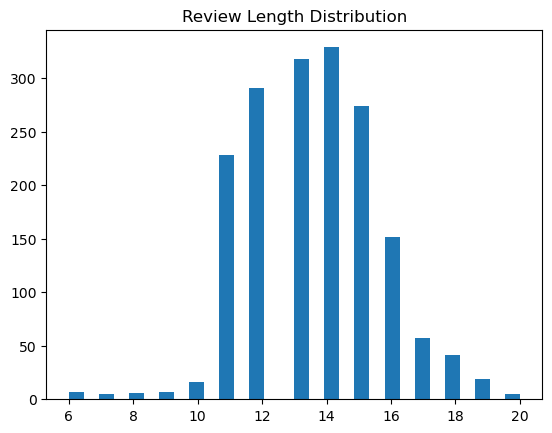

In [28]:
plt.hist(df['Review_Length'], bins=30)
plt.title("Review Length Distribution")
plt.show()

Tokenization

In [29]:
df['Tokens'] = df['Review Text'].apply(lambda x: x.split())

Text Vectorization

In [30]:
glove_dict = {}

In [31]:
with open("glove.6B.50d.txt", "r", encoding="utf8") as file:
    for line in file:
        values = line.strip().split()
        word = values[0]
        vector = []
        for number in values[1:]:
            vector.append(float(number))
        glove_dict[word] = vector

In [32]:
#1 vwctor for each review
review_vectors = []
for idx, row in df.iterrows():
    tokens = row['Tokens']
    word_vectors = []
    for word in tokens:
        if word in glove_dict:
            word_vectors.append(glove_dict[word])
    if len(word_vectors) > 0:
        avg_vector = np.mean(word_vectors, axis=0)
    else:
        avg_vector = np.zeros(50)
    review_vectors.append(avg_vector)

In [33]:
# list of vectors to numpy array
vectors = np.array(review_vectors)

Rule Based Labelling

In [34]:
positive_words = ['easy', 'convenient', 'healthy', 'crispy', 'quick', 'versatile','efficient', 'affordable', 'durable', 'compact', 'lightweight','perfect', 'amazing', 'fantastic', 'reliable','simple', 'userfriendly', 'portable', 'powerful', 'safe', 'quiet','energy-saving', 'time-saving', 'modern', 'stylish', 'nonstick']
negative_words = ['noisy', 'bulky', 'expensive', 'fragile', 'complicated', 'slow', 'smelly', 'inconvenient', 'heavy', 'unreliable', 'unsafe', 'flimsy', 'messy', 'sticky', 'poor', 'overpriced', 'underwhelming', 'annoying', 'defective', 'weak', 'limited','unhealthy', 'burned', 'undercooked', 'dry', 'soggy']
labels = []

for review in df['Review Text']:
    review_words = review.split()
    
    pos_count = sum(1 for word in review_words if word in positive_words)
    neg_count = sum(1 for word in review_words if word in negative_words)

    if pos_count > neg_count:
        labels.append(1)
    elif neg_count > pos_count:
        labels.append(0)
    else:
        labels.append(np.random.choice([0, 1]))

In [35]:
df['label'] = labels

In [36]:
print(df['label'].value_counts())
print(df.shape)

label
1    995
0    760
Name: count, dtype: int64
(1755, 5)


Balancing Dataset

In [37]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['label'] == 0]
df_minority = df[df['label'] == 1]

df_minority_upsampled = resample(
    df_minority, 
    replace=True,    
    n_samples=len(df_majority),   
    random_state=42
)

df_balanced = pd.concat([df_majority, df_minority_upsampled])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

labels = df_balanced['label'].tolist()
vectors = np.array([
    np.mean([glove_dict[word] for word in review.split() if word in glove_dict] or [np.zeros(50)], axis=0)
    for review in df_balanced['Review Text']
])

Data Splitting

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(vectors, labels, test_size=0.2, random_state=42)

In [39]:
import torch

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [40]:
#DataLoaders
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

Building Models

In [41]:
import torch.nn as nn
import torch.optim as optim

Basic Neural Network with 4 Hidden Layers

In [42]:
model = nn.Sequential(
    nn.Linear(50, 128),  
    nn.ReLU(),
    nn.Linear(128, 64),   
    nn.ReLU(),
    nn.Linear(64, 32),    
    nn.ReLU(),
    nn.Linear(32, 16),    
    nn.ReLU(),
    nn.Linear(16, 2)      
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [43]:
epochs = 15

for epoch in range(epochs):
    total_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = loss_fn(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

Epoch 1/15, Loss: 42.3622
Epoch 2/15, Loss: 31.9298
Epoch 3/15, Loss: 28.4549
Epoch 4/15, Loss: 25.2346
Epoch 5/15, Loss: 24.8243
Epoch 6/15, Loss: 19.6393
Epoch 7/15, Loss: 21.4568
Epoch 8/15, Loss: 19.0565
Epoch 9/15, Loss: 17.7280
Epoch 10/15, Loss: 16.5495
Epoch 11/15, Loss: 15.2793
Epoch 12/15, Loss: 14.3278
Epoch 13/15, Loss: 12.2094
Epoch 14/15, Loss: 12.8844
Epoch 15/15, Loss: 14.2054


In [44]:
correct = 0
total = 0

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x)
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

print(f"Test Accuracy: {100 * correct / total}%")

Test Accuracy: 91.11842105263158%


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = torch.argmax(outputs, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

In [47]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy:  {accuracy}")
print(f"Precision: {precision}")
print(f"Recall:    {recall}")
print(f"F1 Score:  {f1}")

Accuracy:  0.9111842105263158
Precision: 0.9038461538461539
Recall:    0.9215686274509803
F1 Score:  0.9126213592233009


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
cm

array([[136,  15],
       [ 12, 141]], dtype=int64)

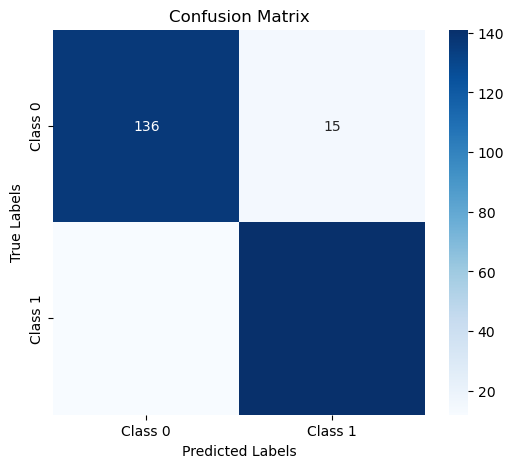

In [49]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Artificial Neural Network Model

In [50]:
class ANN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return self.softmax(out)

In [51]:
#Model Initialization
input_dim = x_train.shape[1]
hidden_dim = 128
output_dim = len(set(labels))  

model = ANN(input_dim, hidden_dim, output_dim)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [52]:
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss:.4f}")

Epoch [1/20], Loss: 49.7760
Epoch [2/20], Loss: 31.7318
Epoch [3/20], Loss: 28.4171
Epoch [4/20], Loss: 24.4554
Epoch [5/20], Loss: 23.9740
Epoch [6/20], Loss: 21.5797
Epoch [7/20], Loss: 22.4227
Epoch [8/20], Loss: 18.4273
Epoch [9/20], Loss: 19.4811
Epoch [10/20], Loss: 15.9532
Epoch [11/20], Loss: 15.1953
Epoch [12/20], Loss: 14.4382
Epoch [13/20], Loss: 15.0484
Epoch [14/20], Loss: 13.2235
Epoch [15/20], Loss: 12.0544
Epoch [16/20], Loss: 10.8174
Epoch [17/20], Loss: 11.9172
Epoch [18/20], Loss: 10.3101
Epoch [19/20], Loss: 9.0262
Epoch [20/20], Loss: 8.5511


In [53]:
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(targets.numpy())
        y_pred.extend(predicted.numpy())

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average="weighted"))
print("Recall:", recall_score(y_true, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_true, y_pred, average="weighted"))

Accuracy: 0.9177631578947368
Precision: 0.9177776828434724
Recall: 0.9177631578947368
F1 Score: 0.9177604880696552


[[138  13]
 [ 12 141]]


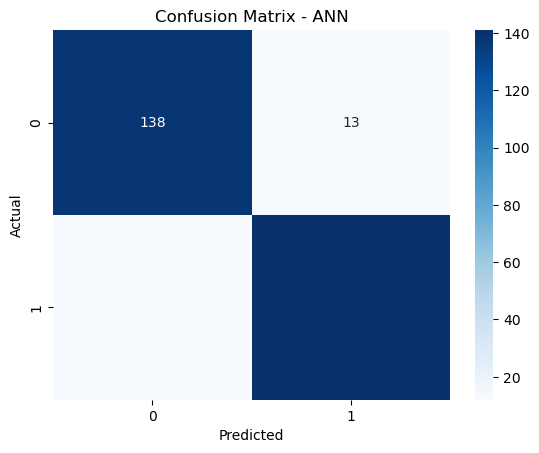

In [54]:
cm = confusion_matrix(y_true, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ANN")
plt.show()

Long Short-Term Memory Model 

In [55]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.unsqueeze(1)
        lstm_out, (hn, cn) = self.lstm(x)
        out = self.fc(hn[-1])  
        return self.softmax(out)

In [56]:
input_dim = x_train.shape[1]
hidden_dim = 128
output_dim = len(set(labels))  

model = LSTMModel(input_dim, hidden_dim, output_dim)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [57]:
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss:.4f}")

Epoch [1/20], Loss: 53.3019
Epoch [2/20], Loss: 32.1667
Epoch [3/20], Loss: 29.0252
Epoch [4/20], Loss: 25.6665
Epoch [5/20], Loss: 23.4922
Epoch [6/20], Loss: 22.7815
Epoch [7/20], Loss: 21.2846
Epoch [8/20], Loss: 18.8850
Epoch [9/20], Loss: 18.0755
Epoch [10/20], Loss: 14.9168
Epoch [11/20], Loss: 14.5128
Epoch [12/20], Loss: 13.4628
Epoch [13/20], Loss: 12.0608
Epoch [14/20], Loss: 13.1533
Epoch [15/20], Loss: 12.2099
Epoch [16/20], Loss: 11.8818
Epoch [17/20], Loss: 10.2933
Epoch [18/20], Loss: 9.3961
Epoch [19/20], Loss: 8.4509
Epoch [20/20], Loss: 7.8870


In [58]:
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(targets.numpy())
        y_pred.extend(predicted.numpy())

In [59]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average="weighted"))
print("Recall:", recall_score(y_true, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_true, y_pred, average="weighted"))

Accuracy: 0.9177631578947368
Precision: 0.9179366028708135
Recall: 0.9177631578947368
F1 Score: 0.9177604883007714


[[140  11]
 [ 14 139]]


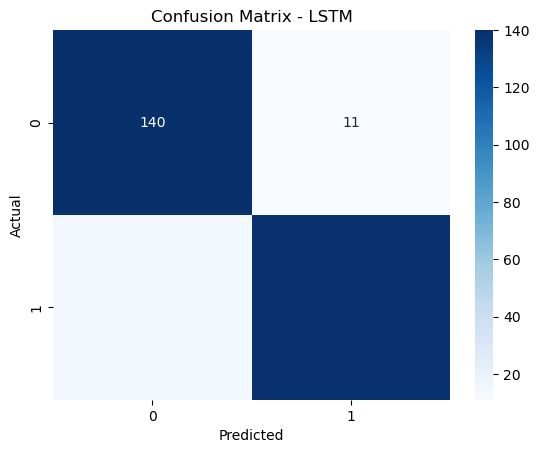

In [60]:
cm = confusion_matrix(y_true, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM")
plt.show()

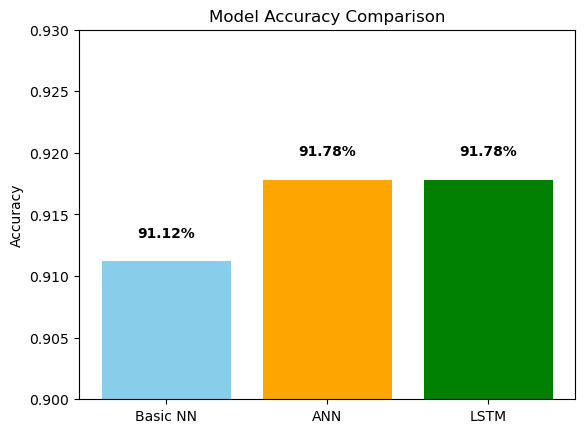

In [61]:
X = ["Basic NN", "ANN", "LSTM"]
Y = [0.9111842105263158, 0.9177631578947368, 0.9177631578947368]

plt.bar(X, Y, color=['skyblue', 'orange', 'green'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

for i, v in enumerate(Y):
    plt.text(i, v + 0.002, f"{v*100:.2f}%", ha='center', fontweight='bold')

plt.ylim(0.9, 0.93)  
plt.show()